# RESTify Controlled Experiment Data Analysis

This Jupyter Notebook is part of the replication package and illustrates study design and results obtained throughout the McGill RESTify Controlled Experiment. Main motivation is easy replication of our statistical tests and results.

Main components of this notebook are:

  * Summary of experiment purpose and setup, then step by step interpretation of raw data collected.
      * For more information about the recruitment process, see the [RESTify Experiment Recruitment Page](https://www.cs.mcgill.ca/~mschie3/recruitment/).
  * Starting point for all analyses is the data automatically mined from study participant submissions.
     * This input data was extracted from the raw participant submissions in a preliminary step. The corresponding details [are described in a later section](#Metrics).
     * The section likewise contains references toward the tools needed for replication of the input data.

 > All statistical figures from our paper submission were created with this codebase. By running this Notebook, you replicate our analysis.

## Introduction

The RESTify controlled experiment involved 28 software developers, who each solved a state-of-the-art development task with two alternative methodologies. Namely, the interest of the experiment was to evaluate the effects of a DSML-centrist toolchain on specific software engineering qualities, by statistic and qualitative comparison of the devlopers' performances for either approach.
The remainder of this document is structured as follows:

 * [We describe a common, state-of-the-art refactoring task](#Task-and-Methodologies) and [define metrics that measure how well it was performed](#Metrics).
 * We then quantify and compare the quality of various task submissions, originating the outcome of several control groups. [The control groups were arranged](#Control-Groups) to pursue refactoring tasks using the DSML based toolchain and respectively manual code refactoring.
 * The main part is a statistical comparison of the measured submission qualities. This is the core contribution of this notebook, for it allows a transparent reproduction of our findings.
     * The Notebook allows local execution of the jupyter code cells, and hence independent replication of our results.
     * The referenced cell source code (hosted likewise in this directory) gives access to the raw data and implementations used, for convenient validation and reuse by the SE community.
 * The notebook concludes with an interpretation of the observed correlations.

The interest of this notebook centers on a fast and transparent replication of our statistical findings and claims. It extends the PDF article of our findings by the possibility to replicate our computations and verify a sane implementation of our metrics. For a contribution that focuses on a causal interpretation of these observations, we refer to a pending conference submission.

### Task and Methodologies

The aforementioned refactoring task is the conversion of legacy code to a RESTful service. Given the omnipresence of legacy systems and the continuously rising relevance of RESTful service based architectures, e.g. Microservice Architectures, this conversion is a recurring, state-of-the-art task with imminent industrial relevance.

#### Reference Context

We captured the refactoring challenge with two legacy systems, representing the e-commerce and gaming contexts frequently associated to RESTful services. Those are vanilla Java applications which express the core functionality of [a BookStore](https://github.com/m5c/BookStoreInternals/releases/tag/RestifyStudy) and [a Tic Tac Toe](https://github.com/m5c/XoxInternals/releases/tag/RestifyStudy) game logic.

In technical detail, [the refactoring task](https://www.cs.mcgill.ca/~mschie3/red/restify-study/) was the conversion of the provided legacy sources to a RESTful service using the Spring Boot framework. Like most technical choices around the experiment, Spring was selected because of its widespread industrial relevance.

#### Methodologies

We considered two orthogonal methodologies for the refactoring task.

  * The classic, code-oriented approach: A software developer manually modifies the project's legacy sources for them to comply to a requested target behaviour. That is to say a developer loads the legacy project in their Integrated Developer Environment (IDE), integrates Spring Boot and exposes existing functionality over REST endpoints using Spring's annotation syntax.
  * The DSML-oriented approach: Legacy sources are examined by a modeling tool and their existing functionality is visualized. The developer then uses a tailored DSML to design the desired interface layout and graphically maps the produced REST endpoints to identified existing functionality. The modeling tool then generates the desired refactored source code.

 > The activity is performed in TouchCORE, an academic prototype that provides a proof-of-concept implementation for the DSML-oriented approach. The details of how the DSML was integrated with the other languages TouchCORE are [described in this publication](https://www.cs.mcgill.ca/~mschie3/contributions/FIDDLR.pdf).

Manual code refactoring is the widespread standard methodology for performing this task. However, lab internal experiments suggested that a DSML oriented approach can significantly outperform this manual methodology with respect to conversion time and correctness of the outcome.
The RESTify controlled experiment was designed to gather the empirical data to test this hypothesis.

### Metrics

We considered two independent factors to measure the quality of the refactored solutions: *Speed* of task completion and *Correctness* of the outcome. These are fair metrics, as the success of industrial projects is likewise held to these standards.

  * In the context of our study, we consider *Speed* as the development time needed until task submission in seconds. That is to say not all time spent on the study was counted, e.g. time to familiarize with the task instruction material was not counted.
  * We define *Correctness* of a solution by means of compliance to a predefined interface and behaviour that observably reacts according to specification. Since the refactoring task mandates exposure of provided functionality through a defined REST interface, we can assess correctness [by automated, canonic tests of all individual interface endpoints](https://github.com/m5c/RestifyAnalyzer). The test pass-rate then provides a normalized notion for correctness, where ```1``` indicates full compliance to the expected interface, i.e. all tests pass. Solutions that do not pass any test receive a ```0```.

Earlier versions of the analysis included a normalized weighted sum of these factors as additional metric to assess success. For completeness the python code is still invoked in this notebook but marked with a disclaimer. In the paper submission we decided against the metric, for the individual factors are not certain to be independent variables, and representation of discrete values in a continuum is misleading.

## Experiment Setup

In this section we describe the efforts made to recruit a statistically sound population, including its partition into four representative groups. We hired a total of 28 software developers with various backgrounds, to mitigate the impact of outliers and cover the diverse spectrum of real-world software developer profiles.

We start by a statistical analysis of the skill sets found in the set of participants and then describe the methodology applied to divide them into comparable groups.

 > Note that in reality we encountered ongoing participant fluctuation, therefore recruitment took place in  iterations. The statistics shown in this document represent the final set of participants.

### Diversity

Recruitment included an auto-assessment of task related skills.

#### Self Assessment Form

Participants were asked to mark their proficiency on [a disseminated evaluation form](https://github.com/m5c/RestifyRecruitmentPage/blob/master/docs/self-assessment.txt). For each of the 8 skill dimensions, we provided a textual metric that helped participants objectively quantify their skills on a scale of one to five.

Below example illustrates how we query proficiency for the singleton pattern:
```
How much do you know about the singleton pattern?
[ ] I don't know what it is.
[ ] I know what it is, but have never used it.
[ ] I have already used it in one of my projects.
[ ] I could verify a provided implementation.
[ ] I could implement it right away from scratch.
```

Participants were then asked to mark the most advanced option applicable.

#### Skill Analysis

We processed all participant self-declared skills and computed the resulting distribution.
The below first cell replicates these computations and generates a distribution overview figures for the following qualifications:

 * Sum of all declared skills, per participant (Mesh)
 * Proficiency in JAVA (Light Grey)
 * Proficiency with the Spring Framework (Mint)
 * Proficiency with the Build-System Maven (Light Blue)
 * Knowledge about the Modeling Tool TouchCORE (Deep Purple)
 * Proficiency with the UNIX/OS command line (Pink)
 * Knowledge about the REST networking paradigm (Red)
 * Knowledge about the Singleton pattern (Orange)
 * Knowledge about Reflection in programming languages (Dark Grey)

 > Note that the above colour scheme for individual skills is maintained for the remainder of this document.

In [ ]:

from jupyter_snippets.pseudo_cell_01_display_population_skill_stats import cell_01

cell_01()

#### Interpretation

We acknowledge the extracted distributions vary by skill. For some skills only a subset of the spectrum is covered, likewise distribution can be approximately normal distributed (`REST`) or strongly biased to a value (`singleton`). We also observe a strong diversity in the population profiles, which we deem a positive factor for the study.
We do recognize that the profiles remain a self-declared assessment. The questions were formulated to maintain objectivity, but by nature self-assessments are prone to subjective biases or psychological factors (dunning kruger effect, imposter phenomenon, scam).
In case of the participant who scored best, we also suspect at least one upfront dishonest declaration, where the associated participant performed extremely poor. We believe the participant had no interest in actual task solving and targeted uniquely the 100 Canadian Dollar gift card issued to participants as compensation. The participant is marked as outlier wherever applicable.

### Control Groups

The purpose of the experiment was a comparison of the two aforementioned methodologies, regarding task solving effects. However, to ensure fairness, we could not simply ask each participant to first refactor using *Methodology A*, followed by refactoring the same application with *Methodology B*, as there are multiple  learning affects to consider:

  * Learning effect from the application context: The first and the second task should not concern the same codebase. We eliminated this effect by alternating between two representative refactoring contexts of comparable complexity:
    * The BookStore, a vanilla e-commerce application representing assortment, comments and stock information for a book vendor.
    * Xox, a vanilla board game application representing an action oriented implementation of Tic Tac Toe.
  * Potentially unfair advantage due to the application or methodology order:
    * Half the population should begin with *Application 1*, the other half should start with *Application 2*.
    * Half the population should begin with *Methodology A*, while the remainder should begin with *Methodology B*

 > For more potential effects, see *Threats to Validity* Section in our publication.

We decided to divide the population into four control groups (*Red*, *Green*, *Blue* and *Yellow)* with different task methodology and context order.

The resulting experimental design is a *Crossover Layout, with Level-2 Blocking Variable*, and can be illustrated as follows:

<div>
<img src="static-figures/salad.png" width="360"/>
</div>

The red square labelled "1" indicates the task details for the first refactoring task of the red control group. In this case it lies in the first quadrant, meaning participants were asked to refactor *Application 1 / E-Commerce* (the BookStore), using *Methodology A / MDE* (The DSML approach with TouchCORE). Similar the red square labelled "2" indicates a task where *Application 2 / Boar Game* (Tic Tac Toe) must be refactored using *Methodology B* (IDE on the example of IntelliJ).

 > Whatever the control group, all task sequences lie on a main diagonals. Furthermore, every group has a symmetric counterpart to offset learning effects in statistics for the full population.

#### Finding a Fair Partition

Although the above partition into complementary control groups offsets learning effects, experiment fairness also depends on a fair group repartition. That is to say the individual control groups must be comparable in terms of their skill profiles.
For instance, we want to avoid any situation where all participants which high technical proficiency end up in one control group and while complementary participants with profound experience are gathered in another.

We deem the total population size of 28 insufficient to purely rely on stochastic balancing effects. We therefore implemented an algorithm to search for an optimized participant repartition.
While the population is still too large to test all potential combinations for viability, we were able to implement [a MiniMax heuristic, that is to say an algorithm that iteratively works toward a viable repartition by minimizing what hinders comparability](https://en.wikipedia.org/wiki/Minimax). Namely, we searched to minimize the maximum distance in average skill proficiency between two control groups. The fully documented sources of our partition algorithm are [publicly available](https://github.com/m5c/RestifyGroupPartitioner).
Tho software also allows brute force testing force placement of replacement participants, which was unfortunately necessary, as recruited participants repeatedly retracted from the study, or ceased any form of communicated, even after a fraction of the results was already collected. We decided for recruitment iterations, searching optimal replacement allocations of multiple participants, to mitigate the effects of changing skill profiles between original participant and replacement.

The below boxplot shows the effective comparability of the final stable population. Every skill is represented by a series of four coloured boxplots, where each plot represents one control group. Ideally we would see the exact boxplot for each control group, that is to say equal mean (represented by a square) and equal distribution (represented by the whiskers).



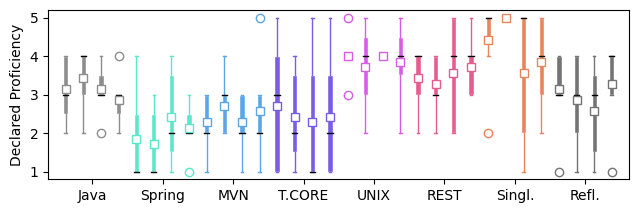

In [34]:
from jupyter_snippets.pseudo_cell_02_display_cgroups_skill_boxplot import cell_02

cell_02()

We acknowledge that the above repartition is fair, yet not optimal. That is to say there would have been partitions that perform better under the metric applied. To some extent this results from the heuristic implemented, which iteratively optimizes the MiniMax, without testing all possible partitions. However, a greater factor is the replacement of unreliable participants by replacements with distinct profiles.

Below computation quantifies overall "*threat*" to control group comparability, under the applied metric. The listing shows the average minimum and maximum skill value for any pair of control groups and any skill. The MiniMax heuristic attempted to keep the greatest offset, between any such two values as low as possible.

In [35]:
from jupyter_snippets.pseudo_cell_04_compute_cgroup_skill_diffs import cell_04
from jupyter_snippets.pseudo_cell_03_merge_csvs import cell_03

cell_03()
cell_04()

<_io.TextIOWrapper name='source-csv-files/skills.csv' mode='r' encoding='utf-8'>
Control group comparability analysis. Listing of the greatest differences (average skill values) between any pairs of control groups:
Java	: 	AVG_MIN=2.9,	AVG_MAX=, 3.4,	MAX_AVG_DIFF=0.6
Spring	: 	AVG_MIN=1.7,	AVG_MAX=, 2.4,	MAX_AVG_DIFF=0.7
MVN	: 	AVG_MIN=2.3,	AVG_MAX=, 2.7,	MAX_AVG_DIFF=0.4
T.CORE	: 	AVG_MIN=2.3,	AVG_MAX=, 2.7,	MAX_AVG_DIFF=0.4
UNIX	: 	AVG_MIN=3.7,	AVG_MAX=, 4.0,	MAX_AVG_DIFF=0.3
REST	: 	AVG_MIN=3.3,	AVG_MAX=, 3.7,	MAX_AVG_DIFF=0.4
Singl.	: 	AVG_MIN=3.6,	AVG_MAX=, 5.0,	MAX_AVG_DIFF=1.4
Refl.	: 	AVG_MIN=2.6,	AVG_MAX=, 3.3,	MAX_AVG_DIFF=0.7
--------------
The worst difference in average skill values between two control groups in the given partition appears for:
	"Singleton", with a difference of 1.4


The greatest offset observed stems from a maximum average skill of ```5.0``` for the singleton pattern (the second and highest orange box in boxplot), compared to an average value of ```3.6``` (the lowest orange box in boxplot). This offset defines the largest difference in terms of average skill offset between two control groups, resulting in an offset of ```1.4``` points on a scale of 1-5.

Although not optimal, we conclude from the above computation that the obtained repartition showcases a sufficient similarity in skill diversity and distribution to allow for a meaningful analysis of the experiment outcome.

# Assessing Submissions

We analysed all 56 submissions (two for each of the 28 paritipants) with respect to *time needed to completion* and *correctness of the submission*. The next two subsections explain in detail how this data was obtained.

## Measuring Time

We recorded the entire task-relevant activity on screen. Summing up the footage of all participants, we collected a total of 72 hours of video material.
We carefully viewed all recordings to measure the effective time spent on task familiarization and completion. The distinction was made as follows: For each task, we asked participants to watch a instruction video. This video illustrates the task methodology on exemplary, non task related application: [The zoo](https://github.com/m5c/Zoo). For every participant, we quantified the time in seconds spent on this task familiarization. We noticed that the measured time would greatly vary, because some participants replicated all demonstrated steps, using the test application, before proceeding to their actual task.
Additionally, the video footage revealed several factors that impact the measurements:

  * Participants used varying playback speed to consume the video instructions.
  * Participants watched the material non-linear, i.e. replaying a specific passage several times or fast forwarding through parts they deem redundant.
  * Participants did not always respect the requested order, that is to say there were cases where a participant would interleave video instructions and own task solving.

We manually extracted time markers, which indicate transitions between the above phases and then used [a custom converter tool](https://github.com/m5c/TimeDiffCalc) to produce the overall time per phase in seconds.
This was especially useful for participants who interleaved instructions and task solving. The listing below shows the ongoing analysis for a participant (*Green Squid*), who frequently alternated between the phases in a matter of minutes and sometimes seconds.

```
Start: 00:01:25 End: 00:02:27 Offset: 00 Diff: 62 [00:01:02]
Start: 00:02:57 End: 00:04:55 Offset: 62 Diff: 180 [00:03:00]
Start: 00:05:22 End: 00:07:10 Offset: 180 Diff: 288 [00:04:48]
Start: 00:08:15 End: 00:08:52 Offset: 288 Diff: 325 [00:05:25]
...
...
...
Start: 02:40:13 End: 02:40:32 Offset: 3025 Diff: 3044 [00:50:44]
Start: 02:46:18 End: 02:47:15 Offset: 3044 Diff: 3101 [00:51:41]
```

We likewise extracted the effective time in seconds for task solving, by cumulating the markers for task-related on screen activity.
The outcome of the described activity are four values per participant, each indicating a duration in seconds:

  * Time spent on preparation of manual task.
  * Time spent on solving manual task solving.
  * Time spent on preparation of model assisted task.
  * Time spent on solving model assisted task.

We will interpret the findings throughout the remainder of this notebook. The raw values are available as CSV file in the [source csv files](source-csv-files/time.csv) directory.

### Reproducibility

We cannot release the original on-screen recordings, as it would break participant anonymity. While participants were instructed to conceal all personal information, the collected video material showcases personal identifiers in abundance, e.g. user profiles on websites, OS menubar and open email inboxes. This effectively means the extracted markers and resulting durations are not replicable to anyone outside the study.

For transparency, we do however provide a detailed transcript of on-screen activity, as part of the [duration CSV file](source-csv-files/time.csv). The noted observations are coherent to the observed durations. Where applicable we will cite from the transcript, to reason about analysis outliers.

## Measuring Submission Correctness

We measured correctness of the submitted solutions by testing against the provided interface specification. More precisely, we compiled and deployed every produced RESTful service and compared the HTTP responses to our test probes to the expected return.
Given the amount of submissions and API endpoints to test, we [implemented a custom test tool](https://github.com/m5c/RestifyAnalyzer), to reliably assess the total of 560 endpoints. Yet the choice was not uniquely made based on the workload.

We also implemented our own testing tool, to better encounter a paradox requirement associated to the applications' stateful nature:
1) Tests must not be dependent, since otherwise a failed test can produce false-negatives for subsequent tests. E.g. if we fail to create a game instance in the Tic Tac Toe backend, necessarily all subsequent calls that interact with the instance must fail, even if their submitted implementation is correct.
2) Tests cannot be independent, since the effectiveness of any state-altering operation needs verification by a subsequent lookup call.

We were able to mitigate the above conflict with the following measures:

 * The test applications are seeded with deterministic state, which fully resets on deployment. This detail of the original implementation allows a programmatic state reset, between any two test probes sent. The overhead is significant, as a full redeploy takes several seconds. Yet we consider this the safest way to eliminate any false-negatives of category 1.
  * All tests for write operations are effectuated twice: Once with subsequent read verification, and once without. Comparison of the outcome delimits the scope of the error, in case of a test failure to few instances, where we ultimately inspected the implementation details manually.

### Reproducibility

The testing results are fully reproducible. We inspected and deprived the participant submissions of all identifiers and [prepared a source code bundle for public download](https://github.com/m5c/RestifyAnalyzer/blob/master/03-uploads-sanitized-sources-models.zip).
We likewise provide the testing tool, alongside with detailed run instructions as [open source project on GitHub](https://github.com/m5c/RestifyAnalyzer).
Anyone can clone the test tool and re-assess the provided submissions to obtain the [same test report CSV](source-csv-files/tests.csv).


# Fused CSV

Note that to facilitate further research by peers we also added a cell to fuse the multiple raw CSV files into a single file. The output is generated to ```generated-csv-files/```


In [36]:
from jupyter_snippets.pseudo_cell_03_merge_csvs import cell_03

cell_03()


<_io.TextIOWrapper name='source-csv-files/skills.csv' mode='r' encoding='utf-8'>


# Data Analysis

At the heart of this notebook lie the statistical analysis performed on the measured *time* and *correctness* data. All statistic figures (and even many more that were excluded from the article for space reasons), as well as all listings from our paper submission are easily replicated by executing the remaining cells.


## Submission Correctness

We begin with a first visualization of test results for participant submissions. At this stage we do not separate by methodology or order, but create two figures, one per group. Black cells indicate failed tests, coloured squares mark an API endpoint that behaved as expected:

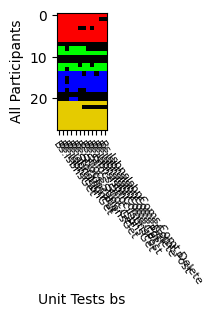

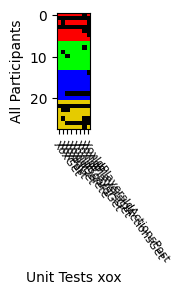

In [37]:
from jupyter_snippets.pseudo_cell_06_all_results_all_participants import cell_06

cell_06()

The next cell condenses the same information to a heatmap with one row per group. Average endpoint correctness over an entire group is now encoded by a gradient, where darker indicates a lower test passrate, brighter a higher test passrate for a given REST resource of the group submissions.


Excluding outlier: blue-turtle


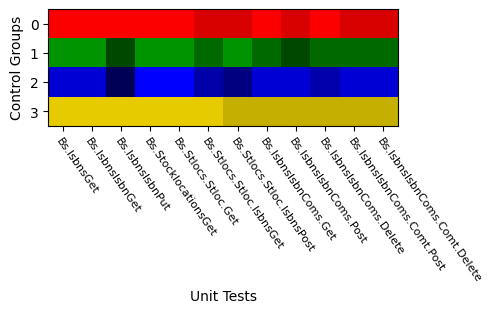

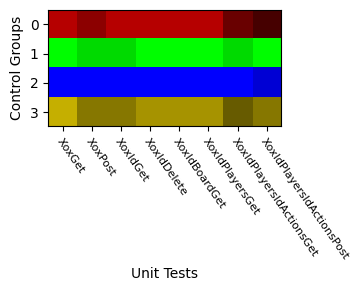

In [38]:
from jupyter_snippets.pseudo_cell_08_all_tests_all_groups import cell_08

cell_08()

Next we illustrate the heatmap information as radar charts, for simpler comparison of groups. Note htat in this step we already filtered one blue candidate who was identified as scammer (had no interest in solving the tasks and disappeared directly after payment).
In the radar charts, every contour represents the average test pass ratio of a control group, the radiants represent individual tests. We note that always a pair of groups encompasses another pair of groups, which is a first indicator for the different group performances, depending on the conversion methodology applied for the task:


Excluding outlier: blue-turtle
Radar numeric values for xox:
Red test average passrates: [0.7142857142857143, 0.5714285714285714, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.42857142857142855, 0.2857142857142857]
Red overall average: 0.6071428571428572
Green test average passrates: [1.0, 0.8571428571428571, 0.8571428571428571, 1.0, 1.0, 1.0, 0.8571428571428571, 1.0]
Green overall average: 0.9464285714285714
Blue test average passrates: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8333333333333334]
Blue overall average: 0.9791666666666666
Yellow test average passrates: [0.8571428571428571, 0.5714285714285714, 0.5714285714285714, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.42857142857142855, 0.5714285714285714]
Yellow overall average: 0.6428571428571428


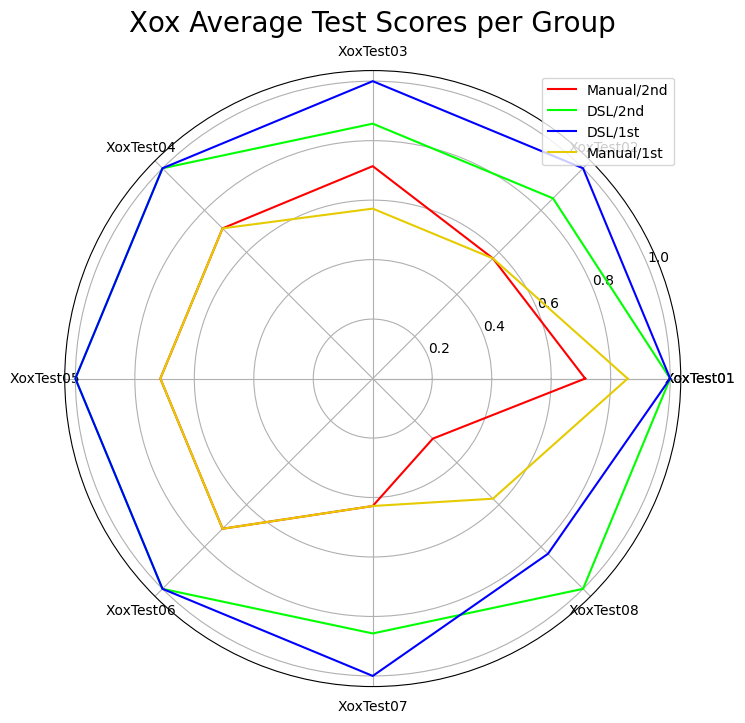

Radar numeric values for bs:
Red test average passrates: [1.0, 1.0, 1.0, 1.0, 1.0, 0.8571428571428571, 0.8571428571428571, 1.0, 0.8571428571428571, 1.0, 0.8571428571428571, 0.8571428571428571]
Red overall average: 0.9404761904761906
Green test average passrates: [0.5714285714285714, 0.5714285714285714, 0.2857142857142857, 0.5714285714285714, 0.5714285714285714, 0.42857142857142855, 0.5714285714285714, 0.42857142857142855, 0.2857142857142857, 0.42857142857142855, 0.42857142857142855, 0.42857142857142855]
Green overall average: 0.46428571428571436
Blue test average passrates: [0.8333333333333334, 0.8333333333333334, 0.3333333333333333, 1.0, 1.0, 0.6666666666666666, 0.5, 0.8333333333333334, 0.8333333333333334, 0.6666666666666666, 0.8333333333333334, 0.8333333333333334]
Blue overall average: 0.763888888888889
Yellow test average passrates: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571]
Y

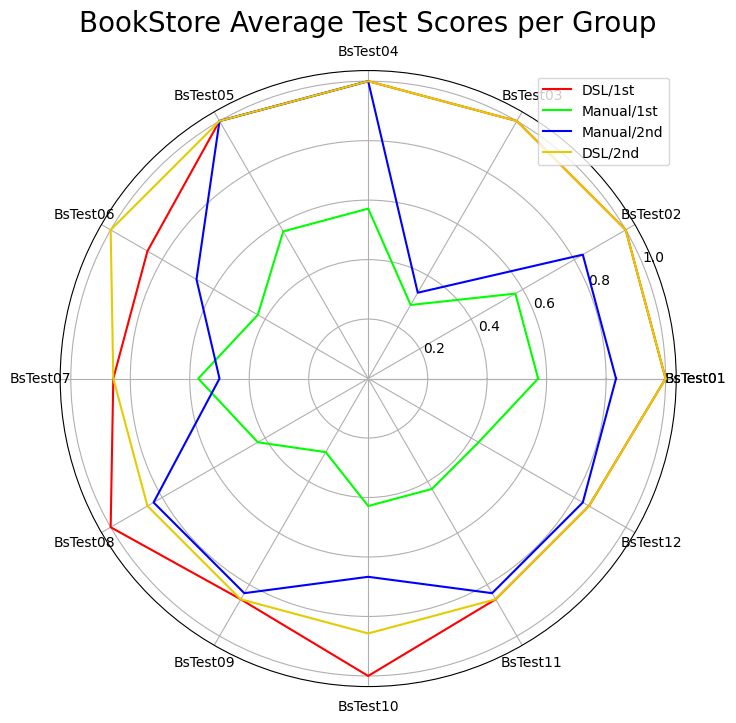

In [39]:
from jupyter_snippets.pseudo_cell_07_all_results_all_groups_radar import cell_07

cell_07()

## General Linear Model

The first statistical analysis for crossover layouts are usually linear models, for the take into account multiple design factors and allow fast estimation of their individual significance for the dependent variable in question.

This cell replicates the four GLMs from our experiment:


Excluding outlier: blue-turtle
APP: xox
Linear Regression for "time"
                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     3.183
Date:                Sat, 30 Mar 2024   Prob (F-statistic):             0.0594
Time:                        10:59:14   Log-Likelihood:                -218.82
No. Observations:                  27   AIC:                             443.6
Df Residuals:                      24   BIC:                             447.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

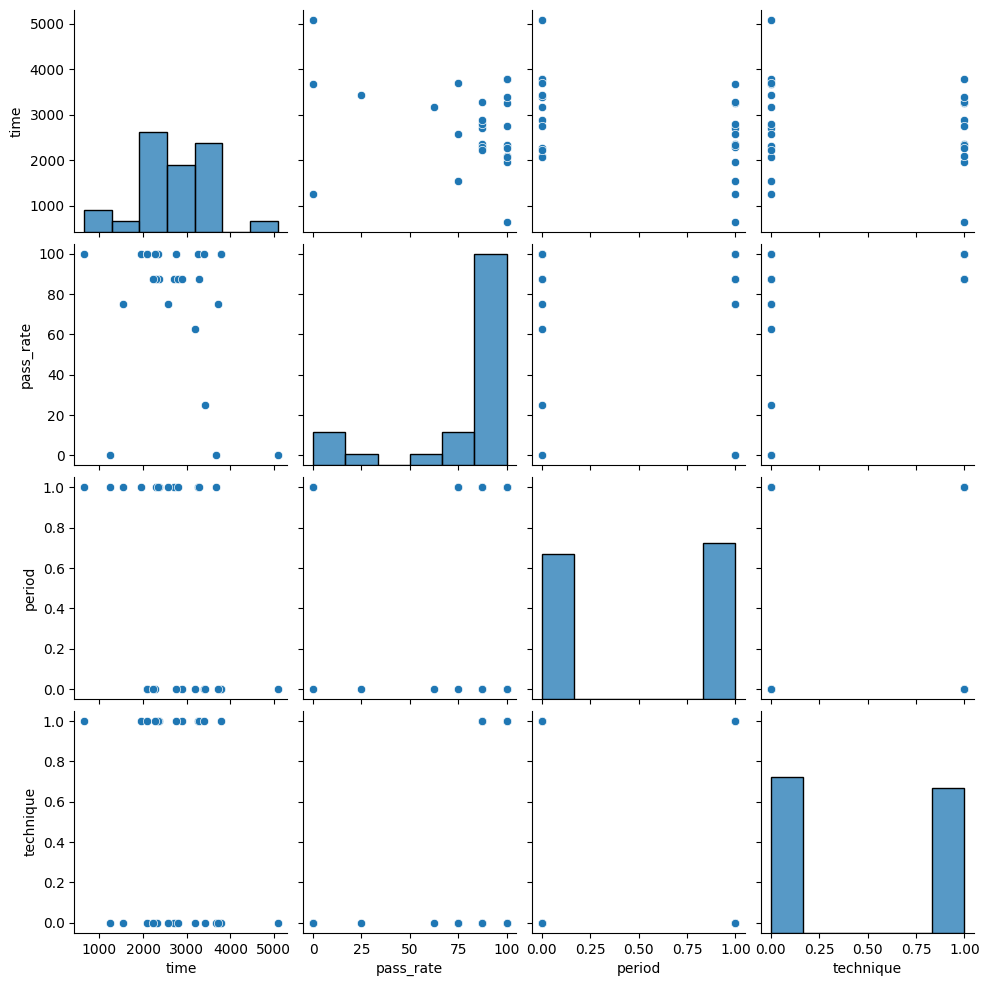

done
APP: bs
Linear Regression for "time"
                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     17.60
Date:                Sat, 30 Mar 2024   Prob (F-statistic):           1.97e-05
Time:                        10:59:16   Log-Likelihood:                -231.64
No. Observations:                  27   AIC:                             469.3
Df Residuals:                      24   BIC:                             473.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const     

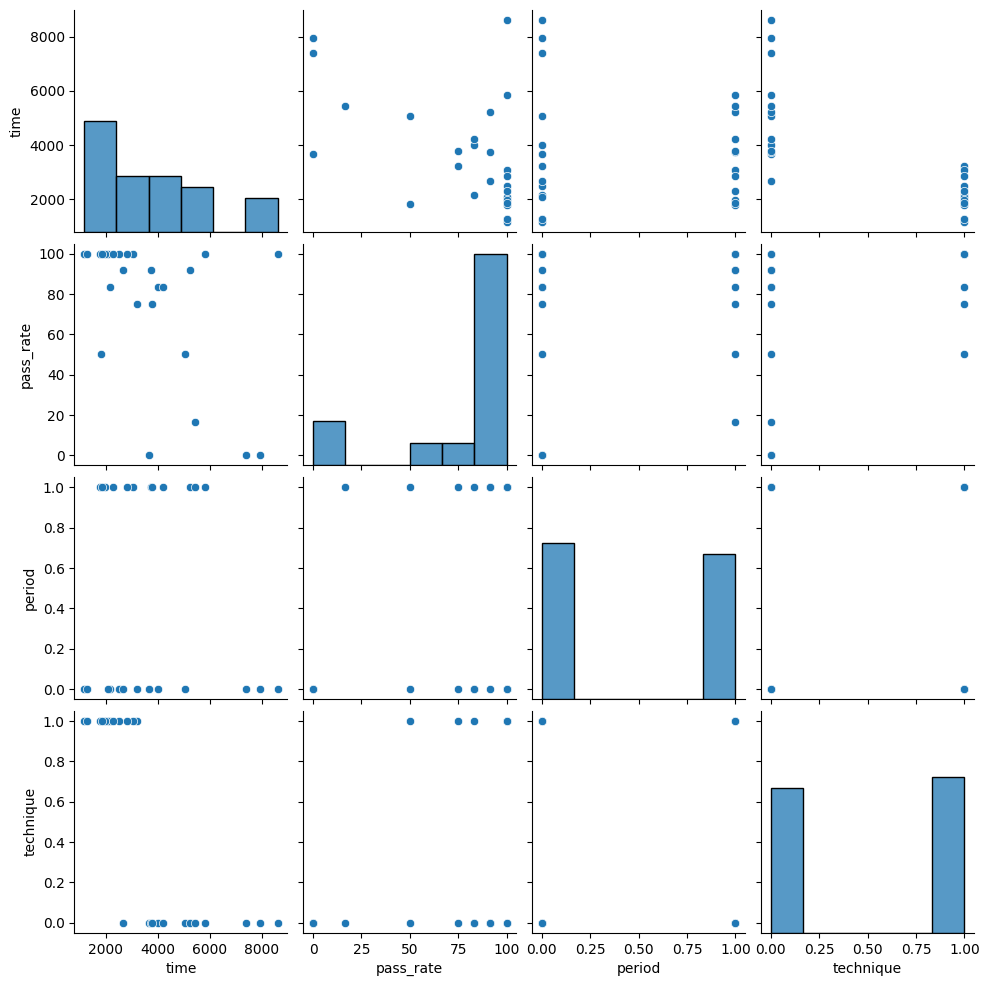

done


In [40]:
from jupyter_snippets.pseudo_cell_05_multi_linear_model import cell_05

cell_05()

## Conversion Time

We are not only interested in the correctness of collected submissions, but also want to know how long it took participants to produce the submissions. We analyzed 72h of video material to extract the effective time participants spent on task preparation and task solving. The following boxplot indicates the pure conversion task time distributions for all groups and all conversion tasks,as well as the numeric time in seconds for group averages.


Excluding outlier: blue-turtle
TcTaskTime for red/green/blue/yellow/orange/turquoise in Tc task [sec]
1951.5714285714287
2304.714285714286
2867.1666666666665
2231.1428571428573
2091.3571428571427
2564.3076923076924
IdeTaskTime for red/green/blue/yellow/orange/turquoise in Ide task [sec]
2407.8571428571427
5618.0
4706.5
3355.0
2881.4285714285716
5197.307692307692

| - | Red #1 | Orange | Yellow #2 | Green #1 | Turquoise | Blue #2 | Blue #1 | Turquoise | Green #2 | Yellow #1 | Orange | Red #2 |
|---|---|---|---|---|---|---|---|---|---|---|---|---|
| max |  3222 | 3222 | 3060 | 8615 | 8615 | 5835 | 3796 | 3796 | 3290 | 5084 | 5084 | 3682 | 
| upper |  2331.5 | 2449.8 | 2565.0 | 7664.0 | 5835.0 | 5390.5 | 3262.5 | 3260.0 | 2808.5 | 3741.0 | 3618.8 | 2753.5 | 
| mean |  2088.0 | 2021.0 | 1954.0 | 5069.0 | 5069.0 | 4716.0 | 2824.5 | 2357.0 | 2332.0 | 3429.0 | 2753.5 | 2568.0 | 
| average |  1951.6 | 2091.4 | 2231.1 | 5618.0 | 5197.3 | 4706.5 | 2867.2 | 2564.3 | 2304.7 | 3355.0 | 2881.4 | 240

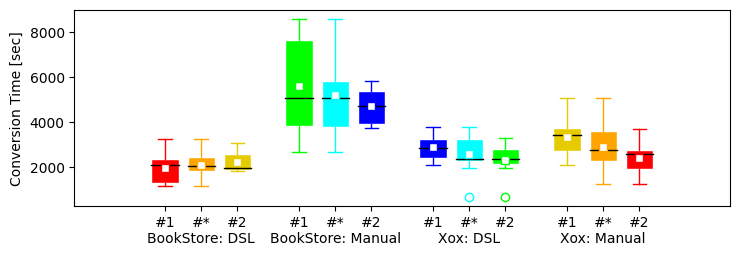

TcUnitPassRate for red/green/blue/yellow/orange/turquoise in Tc unit test pass rate [%]
94.04761904761905
94.64285714285714
97.91666666666667
92.85714285714286
93.45238095238096
96.15384615384616
IdeUnitPassRate for red/green/blue/yellow/orange/turquoise in Ide unit test pass rate [%]
60.714285714285715
46.42857142857143
76.38888888888889
64.28571428571429
62.5
60.25641025641025

| - | Red #1 | Orange | Yellow #2 | Green #1 | Turquoise | Blue #2 | Blue #1 | Turquoise | Green #2 | Yellow #1 | Orange | Red #2 |
|---|---|---|---|---|---|---|---|---|---|---|---|---|
| max |  100.0 | 100.0 | 100.0 | 100.0 | 100.0 | 100.0 | 100.0 | 100.0 | 100.0 | 100.0 | 100.0 | 100.0 | 
| upper |  100.0 | 100.0 | 100.0 | 87.5 | 91.7 | 91.7 | 100.0 | 100.0 | 100.0 | 93.8 | 87.5 | 87.5 | 
| mean |  100.0 | 100.0 | 100.0 | 50.0 | 83.3 | 87.5 | 100.0 | 100.0 | 100.0 | 75.0 | 75.0 | 75.0 | 
| average |  94.0 | 93.5 | 92.9 | 46.4 | 60.3 | 76.4 | 97.9 | 96.2 | 94.6 | 64.3 | 62.5 | 60.7 | 
| lower |  91.7 | 100.0 

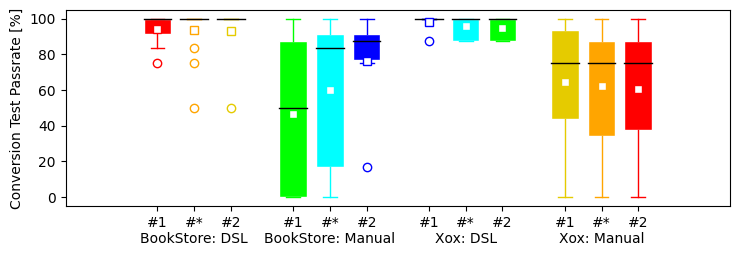

In [41]:
from jupyter_snippets.pseudo_cell_10_time_and_passrate_boxplot import cell_10

cell_10()

 We used the wilcoxon rank sum test to assess whether there is a significant difference in distribution between orange / turquoise sample distributions (same application, different conversion technique) of the previous graphics. (Orange / Turquoise are the fused samples of groups where only task order differs). The cell also prints numeric representation of the above boxplots, to allow for a mean based effect size estimation.

 > Note: ConhensD was not used in the publication, for it is only defined on normal distributed samples (which is not necessarily the case).

In [42]:
from jupyter_snippets.pseudo_cell_11_fused_group_statistic_tests import cell_11

cell_11()

Excluding outlier: blue-turtle

Wilcoxon for: BookStore (Time)
RanksumsResult(statistic=-4.270301957345332, pvalue=1.9520849419531694e-05)

Wilcoxon for: BookStore (PassRate)
RanksumsResult(statistic=2.8145171991594236, pvalue=0.004885056354422458)

Wilcoxon for: Xox (Time)
RanksumsResult(statistic=0.6308400618805604, pvalue=0.5281451058237828)

Wilcoxon for: Xox (PassRate)
RanksumsResult(statistic=-2.8873064370687187, pvalue=0.0038855559861807453)


| Metric | Orange Median | Turquoise Median | Median Offset | Orange Average | Turquoise Average | Average Offset |
|---|---|---|---|---|---|---|
| BookStore (Time) | 2021.0 | 5069.0 | 3048.0 | 2091.4 | 5197.3 | 3106.0 |
| BookStore (PassRate) | 100.0 | 83.3 | 16.7 | 93.5 | 60.3 | 33.2 |
| Xox (Time) | 2753.5 | 2357.0 | 396.5 | 2881.4 | 2564.3 | 317.1 |
| Xox (PassRate) | 75.0 | 100.0 | 25.0 | 62.5 | 96.2 | 33.7 |


---
Orange BookStore Assisted Time
ShapiroResult(statistic=0.9491822123527527, pvalue=0.5480824708938599)
True
False: Null Hy

# Scatter Relations

Next we put all previous findings into correlation, by creating series of scatters. Every dot represents one participant. In every scatter series we inspect a different aspect for potential correlation.

 > Keep in mind that this notebook is a starting point for replication of our statistical analysis, not so much of the interpretations. Please see the paper submission for an evaluation and discussion.

We begin by assessing whether the task execution time depends on the time spent on task familiarization:

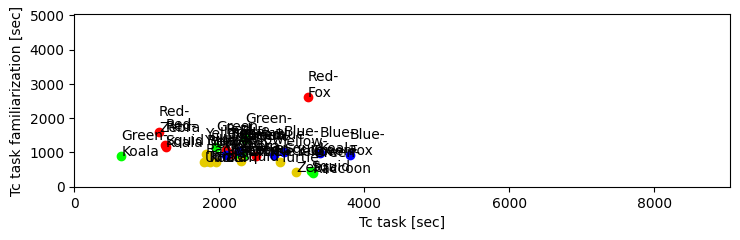

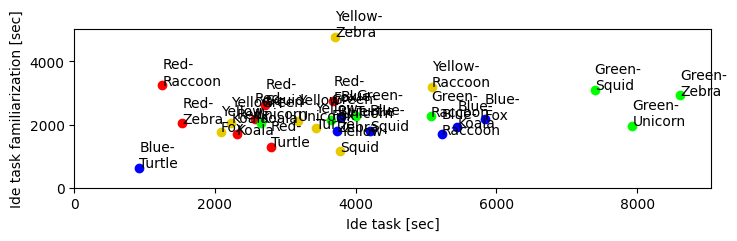

In [43]:
from jupyter_snippets.pseudo_cell_12_pretime_time_scatter import cell_12

cell_12()

Next we inspect if there is a visual correlation between time spent on a task and the correctness of the outcome.


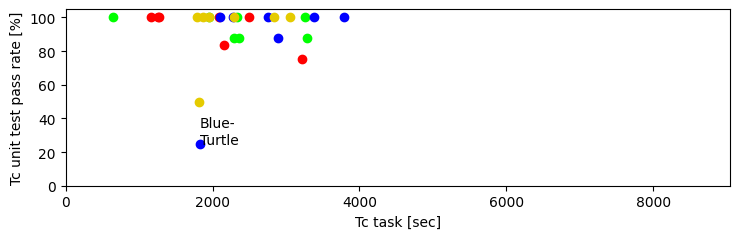

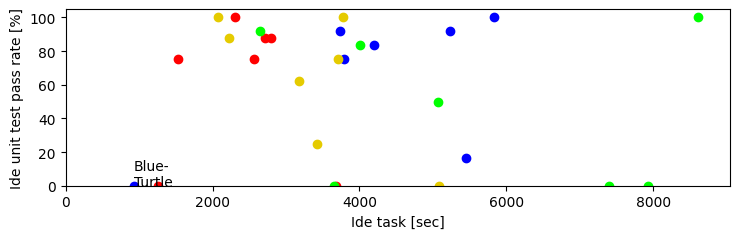

In [44]:
from jupyter_snippets.pseudo_cell_13_time_passrate_scatter import cell_13

cell_13()

Next we are interested in a potential correlation of time spent on task familiariation and submission correctness:


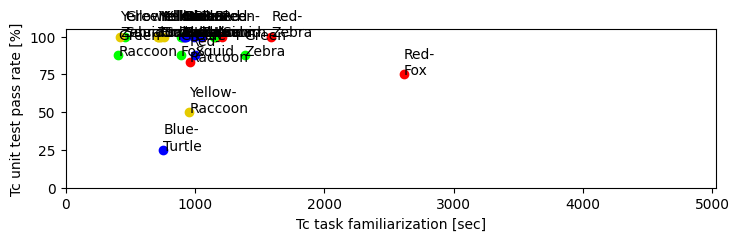

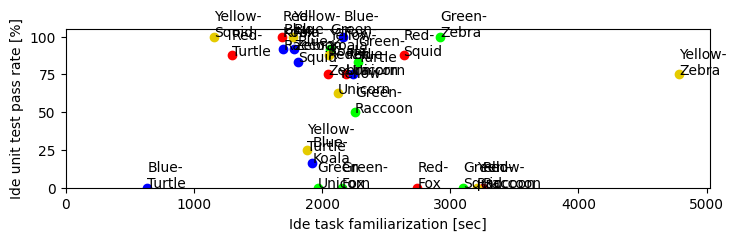

In [45]:
from jupyter_snippets.pseudo_cell_14_pretime_passrate_scatter import cell_14

cell_14()

We also analyze the effects of participants skill scores on the converted software correctness, regardless of the application refactored or methodology used:

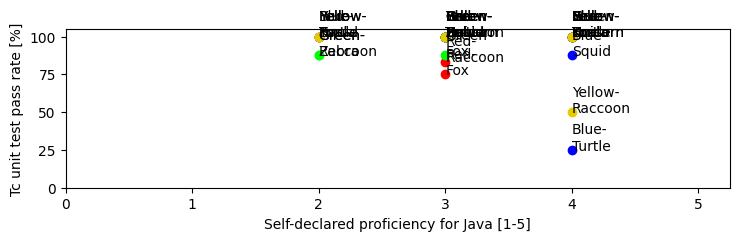

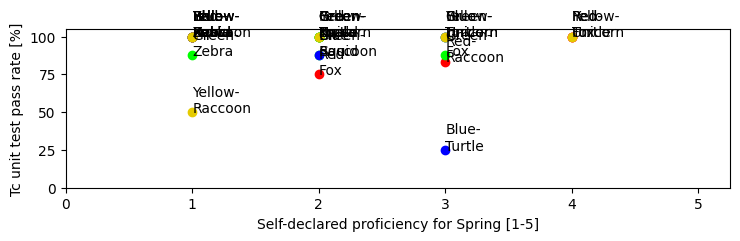

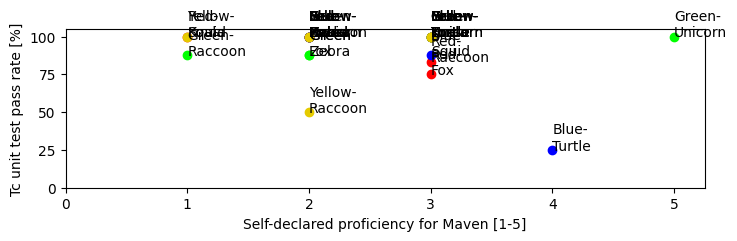

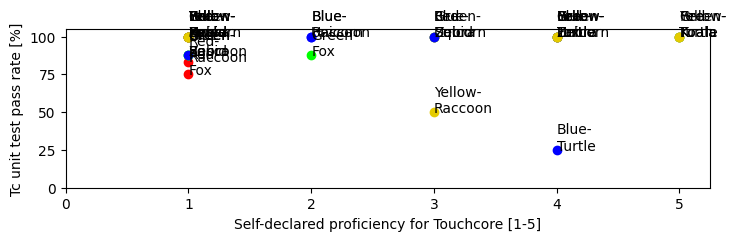

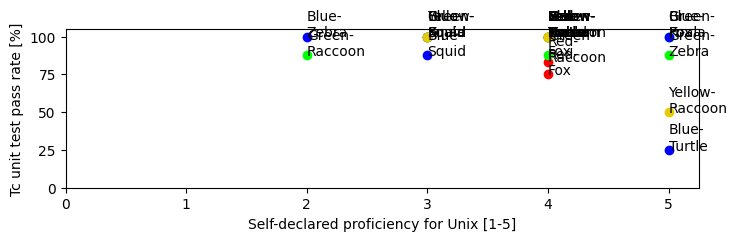

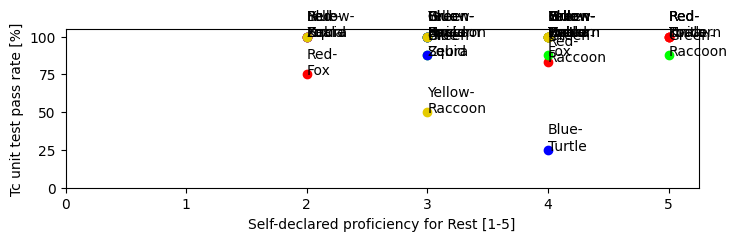

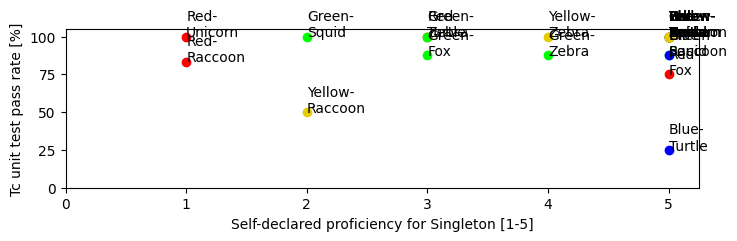

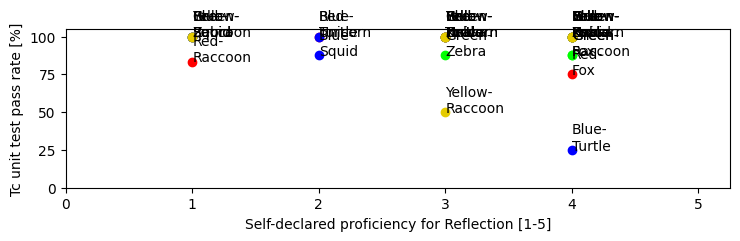

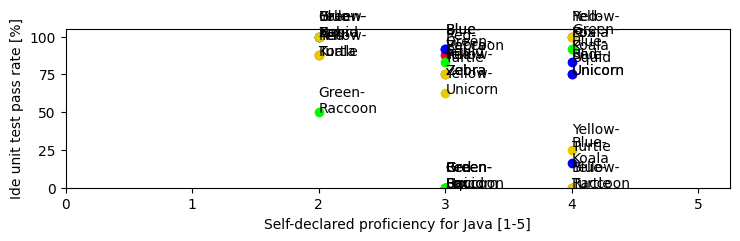

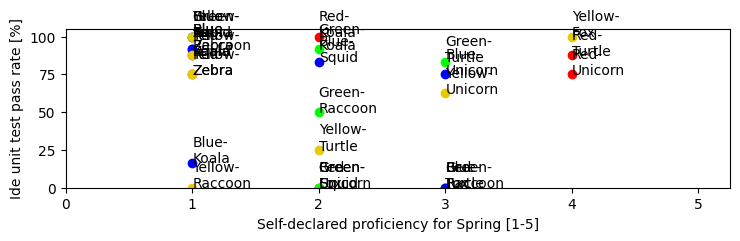

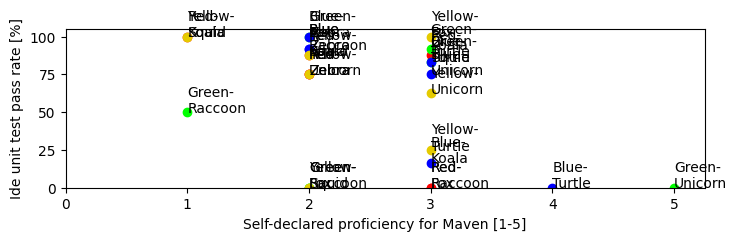

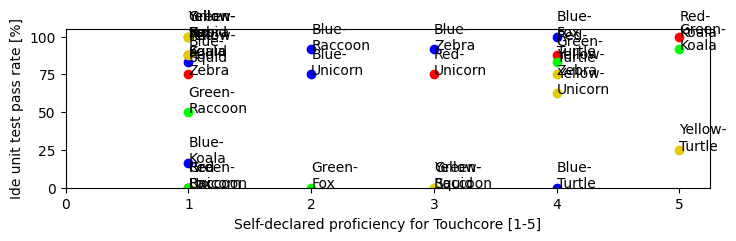

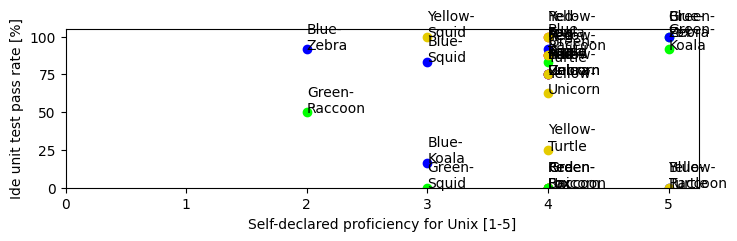

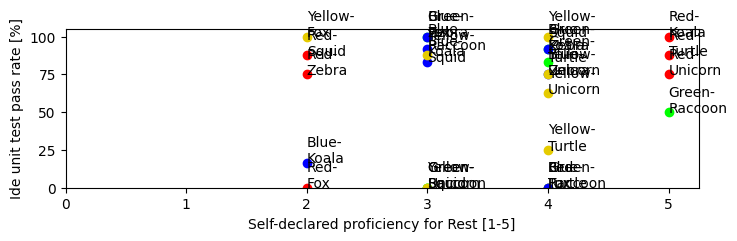

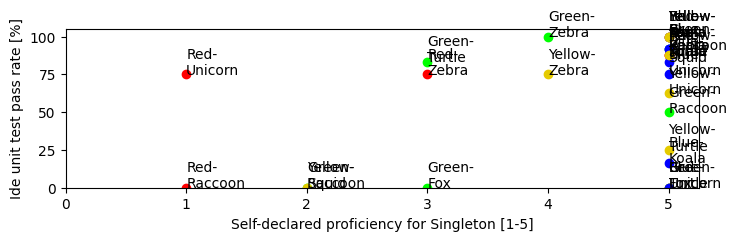

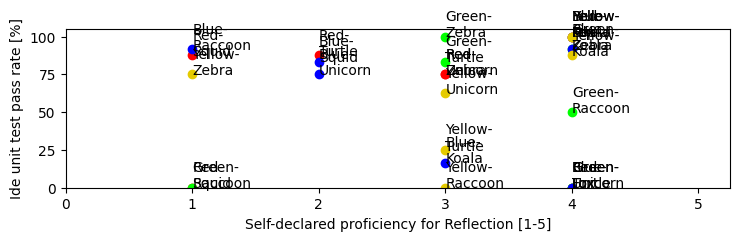

In [46]:
from jupyter_snippets.pseudo_cell_15_skill_passrate_scatter import cell_15

cell_15()


Finally, we also created a scatter to visualize the relation between total skill sum (as self-declared by a participant during recruitment) and the overal test passrate measured:


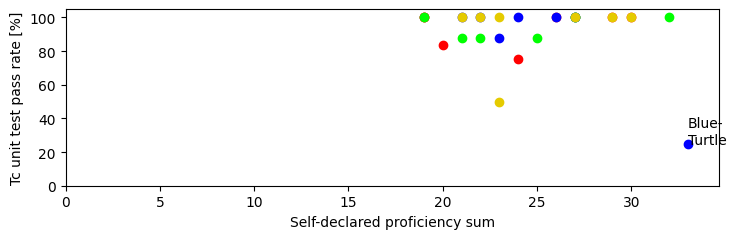

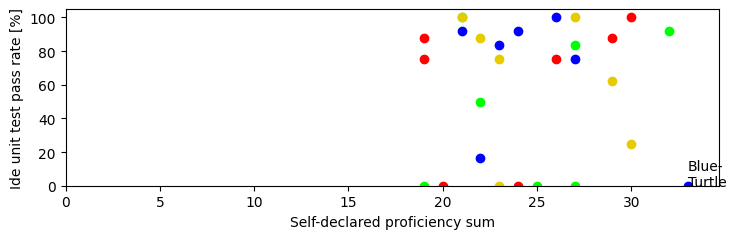

In [47]:
from jupyter_snippets.pseudo_cell_16_skillsum_passrate_scatter import cell_16

cell_16()



Next we investigate if more time spent on task preparation leads to a measurable higher correctness of the outcome. We likewise perform a Pearson test for linear correlation:


In [48]:
from jupyter_snippets.pseudo_cell_21_pearson_pretime_skillsum import cell_21

cell_21()

Excluding outlier: blue-turtle
Methodology: tc
Pre-Time to Time: PearsonRResult(statistic=-0.1085738738686436, pvalue=0.5898394208737044)
Pre-Time to Pass-Rate: PearsonRResult(statistic=-0.2976015637854746, pvalue=0.1316547389411278)
Skill-Sum to Time: PearsonRResult(statistic=-0.23235869533918788, pvalue=0.24349794446892714)
Skill-Sum to Pass-Rate: PearsonRResult(statistic=0.2129332422540285, pvalue=0.2862572123697949)
Note: Linear correlation result ("statistic") is only significant if "pvalue" is smaller than 0.05
Methodology: ide
Pre-Time to Time: PearsonRResult(statistic=0.15073025763752934, pvalue=0.4529776939357267)
Pre-Time to Pass-Rate: PearsonRResult(statistic=-0.33152220525474235, pvalue=0.09116530158188958)
Skill-Sum to Time: PearsonRResult(statistic=-0.19576366422731284, pvalue=0.3277794099511302)
Skill-Sum to Pass-Rate: PearsonRResult(statistic=0.1553666226107227, pvalue=0.4390345156097981)
Note: Linear correlation result ("statistic") is only significant if "pvalue" is s

Likewise, we find no statistically significant correlation.

# Error Causes

Below graphic illustrates ratio of level one (application can be deployed or not as a whole) for all received submissions. Note that submissions marked in yellow showcased only a minimal configuration error / missing files that could be reconstructed from video assessment, i.e. those were actually included in the fine-grained test analysis of all REST endpoints.


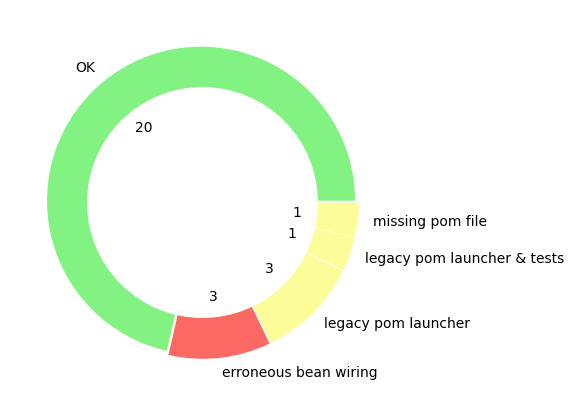

In [49]:
from jupyter_snippets.pseudo_cell_18_fail_cause_stage_1 import cell_18

cell_18()

# Participant Feedback

In this last section we evaluate the feedback provided by participants, to create a barchart. It puts into relation the amount of participants who preferred the DSL tool, were neutral, or are more positive toward the manual project conversion technique, for three questions:


[25, 1, 1]
[13, 1, 13]
[6, 6, 15]


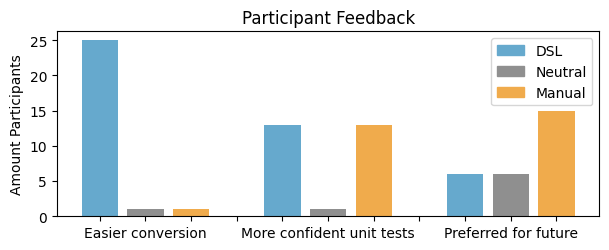

In [50]:
from jupyter_snippets.pseudo_cell_22_participant_feedback import cell_22

cell_22()